In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lakeview as lv

In [2]:
CHROMOSOME = "17"
ILLUMINA_BAM_PATH = "../../data/SKBR3_Illumina_550bp_pcrFREE.bam"

painter = lv.SequenceAlignment.from_file(
    ILLUMINA_BAM_PATH, region=CHROMOSOME
)

(0.0, 1.0, 0.0, 1.0)

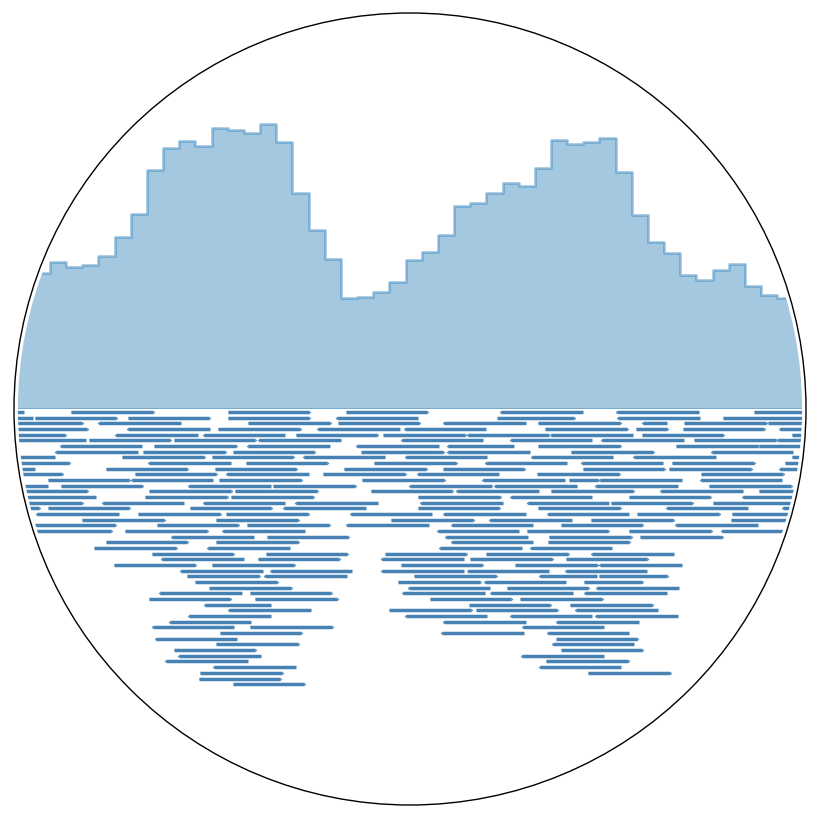

In [15]:
xlim = (6.404e7 + 2950, 6.404e7 + 3940)
rng = np.random.default_rng(4)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes((0, 0.5, 1, 0.5))
ax2 = fig.add_axes((0, 0, 1, 0.5))
ax3 = fig.add_axes((0, 0, 1, 1))


painter.draw_pileup(ax1, window_size=20, show_mismatches=False, pileup_kw=dict(facecolor='tab:blue', edgecolor='tab:blue', linewidth=2, alpha=0.4))
painter.draw_alignment(
    ax2,
    sort_by=lambda __: rng.random(),
    filter_by=lambda __: rng.random() < 0.5,
    color_by=lambda __: 'steelblue',
    show_mismatches=False,
    show_insertions=False,
    show_deletions=False,
    show_soft_clippings=False,
    show_hard_clippings=False,
    height=2.5,
    min_spacing=1,
)
circle1 = plt.Circle((0.5, 0.5), radius=0.495, transform=ax3.transAxes, ec='k', fc='none', zorder=1)
circle2 = plt.Circle((0.5, 0.5), radius=0.55, transform=ax3.transAxes, ec='w', fc='none', lw=69, zorder=0)
ax3.add_patch(circle1)
ax3.add_patch(circle2)

h = 0.35
rect1 = plt.Rectangle((0, 0.5-h), width=1, height=2*h, ec='k', fc='none')



ax1.set_xlim(xlim)
ax1.set_ylim(0, 100)

ax2.set_xlim(xlim)
ax2.set_ylim(70, -0.5)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

#ax3.add_patch(rect1)